# Cleaning and EDA

In [1]:
#Import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from pandas import *
%matplotlib inline

In [2]:
#Loading data
#df = pd.read_csv('../data/query.csv', encoding='utf-8', index_col=None, sep=',')
df = pd.concat(map(pd.read_csv,
                   ['../data/August.csv','../data/September.csv','../data/October.csv','../data/November.csv',
                    '../data/December.csv','../data/January.csv','../data/February.csv','../data/March.csv',
                    '../data/April.csv','../data/May.csv','../data/June.csv','../data/July.csv']),axis=0, ignore_index=True)

df = df.drop(['CreationDate'],axis=1)
df.head()

,Title,Body,Tags
0,change text in the second column in the ViewHo...,<p>I want to change the text color of the seco...,<android><android-recyclerview><recycler-adapt...
1,How to add individual elements of list into an...,<p>For example i have the below list</p>\n\n<p...,<python><python-2.7>
2,What's the difference between serialize and en...,"<p>I'm using <a href=""https://api.symfony.com/...",<symfony><serialization>
3,Django: Best way to create a multiple choice f...,<p>WHen creating a multiple choice option in D...,<django><django-models>
4,re-organize json data with vanilla javascript,<p>I am consuming data from a web service that...,<javascript>


In [3]:
df.Body[6]

"<p>I'm sure this is in SO somewhere but I can't seem to find it. I'm trying to remove or select designated <code>columns</code> in a <code>pandas df</code>. But I want to keep certain values or <code>strings</code> from those deleted <code>columns</code>. </p>\n\n<p>For the <code>df</code> below I want to keep <code>'Big','Cat'</code> in <code>Col B,C</code> but delete everything else.</p>\n\n<pre><code>import pandas as pd\n\nd = ({\n    'A' : ['A','Keep','A','Value'],           \n    'B' : ['Big','X','Big','Y'],\n    'C' : ['Cat','X','Cat','Y'],\n    })\n\ndf = pd.DataFrame(data=d)\n</code></pre>\n\n<p>If I do either the following it only selects that row.</p>\n\n<pre><code>Big = df[df['B'] == 'Big']\nCat = df[df['C'] == 'Cat']\n</code></pre>\n\n<p>My intended output is:</p>\n\n<pre><code>       A    B    C\n0      A  Big  Cat\n1   Keep          \n2      A  Big  Cat\n3  Value \n</code></pre>\n\n<p>I need something like <code>x = df[df['B','C'] != 'Big','Cat']</code></p>\n"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444057 entries, 0 to 444056
Data columns (total 3 columns):
Title    444057 non-null object
Body     444057 non-null object
Tags     444057 non-null object
dtypes: object(3)
memory usage: 10.2+ MB


In [5]:
#Duplicates in our dataframe
df.duplicated().sum()

0

Text(0.5, 1.0, 'Ratio of missing values per columns')

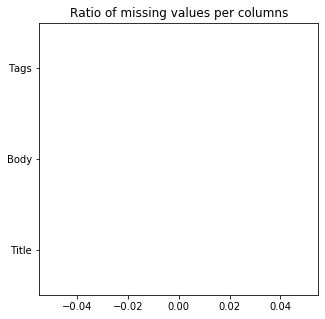

In [6]:
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

No duplicates and no missing values in our datas

### Tags 

In [17]:
#Create a copy of our datframe
df1 = df.copy()

In [18]:
#Split tags
df1['Tags'] = df1['Tags'].apply(lambda x: x.replace('<',''))
df1['Tags'] = df1['Tags'].apply(lambda x: x.strip('>'))
df1['Tags'] = df1['Tags'].apply(lambda x: x.split('>'))

In [19]:
import collections

number_tags = [len(x) for x in df1['Tags']]
frequency = collections.Counter(number_tags)
number_tags = pd.DataFrame(list(frequency.items()), columns=['number of tags', 'frequency'])
number_tags

,number of tags,frequency
0,4,79530
1,2,127135
2,1,60137
3,3,125749
4,5,51503
5,6,3


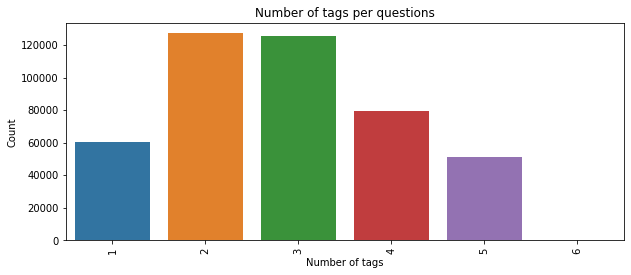

In [20]:
fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x=number_tags['number of tags'], y=number_tags['frequency'])

plt.xticks(rotation=90)

plt.ylabel('Count')
plt.xlabel('Number of tags')
plt.title('Number of tags per questions')

plt.show()

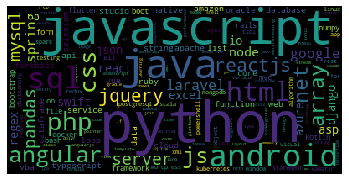

In [58]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
WordCloud(stopwords=set()).generate_from_frequencies(freq_tags)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [22]:
df1.Tags.values

array([list(['android', 'android-recyclerview', 'recycler-adapter', 'android-viewholder']),
       list(['python', 'python-2.7']), list(['symfony', 'serialization']),
       ..., list(['javascript', 'angular', 'angular-reactive-forms']),
       list(['pandas']), list(['python'])], dtype=object)

In [28]:
from nltk.probability import ConditionalFreqDist
import pickle

all_tags = [item for sublist in df1['Tags'].values for item in sublist]

freq_tags = nltk.FreqDist(all_tags)

freq_top_tags = freq_tags.most_common(150)

top_tags = [word[0] for word in freq_top_tags]
pickle.dump(top_tags,open('top_tags.sav', 'wb'))

In [29]:
type(freq_tags)

nltk.probability.FreqDist

In [30]:
keywords = pd.DataFrame(freq_top_tags)

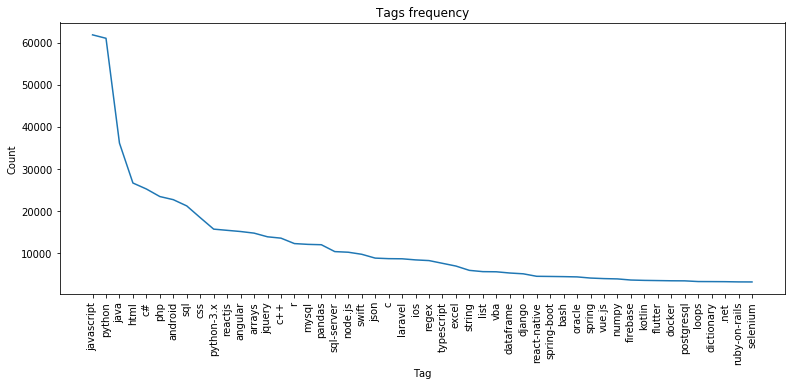

In [31]:
plt.figure(figsize=(13,5))

plt.plot(keywords.iloc[0:50,0], keywords.iloc[0:50,1])

plt.ylabel('Count')
plt.xlabel('Tag')
plt.title('Tags frequency')
plt.xticks(rotation=90)

plt.show()

In [32]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in top_tags:
            tags_filtered.append(tags[i])
    return tags_filtered

In [33]:
df1['Tags'] = df1['Tags'].apply(lambda x: most_common(x))

In [26]:
df1.head()

,Title,Body,Tags
0,change text in the second column in the ViewHo...,<p>I want to change the text color of the seco...,[android]
1,How to add individual elements of list into an...,<p>For example i have the below list</p>\n\n<p...,"[python, python-2.7]"
2,What's the difference between serialize and en...,"<p>I'm using <a href=""https://api.symfony.com/...",[]
3,Django: Best way to create a multiple choice f...,<p>WHen creating a multiple choice option in D...,[django]
4,re-organize json data with vanilla javascript,<p>I am consuming data from a web service that...,[javascript]


In [13]:
#Strip all '<' characters
df['Tags'] = [x.replace('<','') for x in df.Tags]
df['Tags'] = [x.strip('>') for x in df.Tags]
#split all tags
tags = df['Tags'].str.split('>', expand = True).stack()
#Counting each occurence of a tag
tags = tags.value_counts()
#Get a dataframe of all tags
tags = pd.DataFrame(tags)
#Add an index to this dataframe
tags.reset_index(inplace=True)
#Rename the columns
columns = ['tag', 'frequence']
tags.columns = columns

tags.head()

,tag,frequence
0,javascript,61855
1,python,61038
2,java,36114
3,html,26626
4,c#,25203


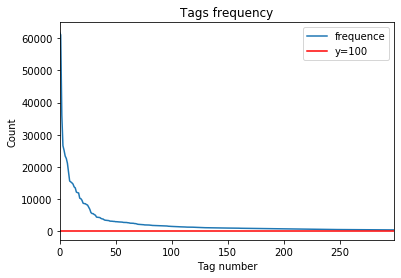

In [15]:
#Analysis of the 150 first tags
common_tags = tags.iloc[0:300,:]
common_tags.plot( label = 'frequence').axhline(y=100, color='r', linestyle='-', label='y=100')
plt.ylabel('Count')
plt.xlabel('Tag number')
plt.title('Tags frequency')
plt.legend(loc='upper right')
plt.show()

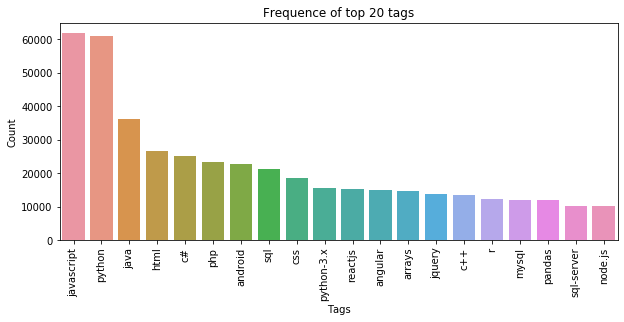

In [16]:
#Frequence of the 20 most popular tags
top_tags = tags.iloc[0:20,:]


fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x=top_tags.tag, y=top_tags.frequence)

plt.xticks(rotation=90)

plt.ylabel('Count')
plt.xlabel('Tags')
plt.title('Frequence of top 20 tags')

plt.show()


Taking only the first 100 tags are enough since they represent more than 

### Body

In [34]:
#Create a copy of our data
new_df = df1.copy()

In [35]:
#Replace all balise code to the same one in order to split
new_df['Body'] = new_df['Body'].str.replace('</code>','<code>')
new_df.Body.head(10)

0    <p>I want to change the text color of the seco...
1    <p>For example i have the below list</p>\n\n<p...
2    <p>I'm using <a href="https://api.symfony.com/...
3    <p>WHen creating a multiple choice option in D...
4    <p>I am consuming data from a web service that...
5    <p>please I have three Models: lecturers, leve...
6    <p>I'm sure this is in SO somewhere but I can'...
7    <p>I am trying to do the enter-update-exit pat...
8    <p>I went ahead and followed <a href="https://...
9    <p>I am trying to read a JSON file from Amazon...
Name: Body, dtype: object

In [36]:
#Separate code from the body
new_df['Body'] = new_df['Body'].str.split('<code>')
new_df.Body.head(10)

0    [<p>I want to change the text color of the sec...
1    [<p>For example i have the below list</p>\n\n<...
2    [<p>I'm using <a href="https://api.symfony.com...
3    [<p>WHen creating a multiple choice option in ...
4    [<p>I am consuming data from a web service tha...
5    [<p>please I have three Models: lecturers, lev...
6    [<p>I'm sure this is in SO somewhere but I can...
7    [<p>I am trying to do the enter-update-exit pa...
8    [<p>I went ahead and followed <a href="https:/...
9    [<p>I am trying to read a JSON file from Amazo...
Name: Body, dtype: object

In [37]:
s = []
for x in new_df.Body :
    s.append([elt for idx, elt in enumerate(x) if idx % 2 != 0])
    
new_df['Code'] = s

In [38]:
for i,x in enumerate(new_df['Body']) :
    for y in new_df['Code'][i] :
        x.remove(y)

In [39]:
new_df['Body'] = [''.join(x) for x in new_df['Body']]
new_df['Code'] = [''.join(x) for x in new_df['Code']]

In [40]:
from bs4 import BeautifulSoup

new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text(strip=True)) 

In [41]:
new_df['Body'] = new_df['Body'].apply(lambda x: x.lower())

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
import re 

token = ToktokTokenizer()
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_punct(text): 
    words = token.tokenize(text)
    punctuation_filtered = []
    for w in words:
        if w in top_tags:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(re.sub(r'[^\w\s]','',w))
        
    return ' '.join(map(str, punctuation_filtered))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

def lemitizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, pos="v") #pos =v lemmatize to the verbe shape
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]  
    return ' '.join(map(str, filtered))

In [43]:
new_df['Body'] = new_df['Body'].apply(lambda x: re.sub('[0-9]','',x))
new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x))
new_df['Body'] = new_df['Body'].apply(lambda x: clean_punct(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x)) 

In [44]:
new_df['Title'] = new_df['Title'].apply(lambda x: re.sub('[0-9]','',x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_punct(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x)) 

In [45]:
new_df.head()

,Title,Body,Tags,Code
0,change text second column viewholder,want change text color second column less turn...,"[android, android-recyclerview]",@Override\npublic void onBindViewHolder(@NonNu...
1,add individual elements list another list python,example listi want add individual elements lis...,"[python, python-2.7]","list1 = [] \nlist2 = ['cat', 'tiger']\nlist1.a..."
2,difference serialize encode,usingsymfonycomponentserializerserializer sure...,[],serializeencode
3,django best way create multiple choice field,create multiple choice option django seem two ...,[django],"TYPE_CHOICES=(\n ('teacher', (""Teacher"")),\..."
4,reorganize json data vanilla javascript,consume data web service send json data follow...,[javascript],function dbDateTimeToDateTme(value){\n /*\n ...


In [46]:
new_df.Body[6]

'sure somewhere seem find try remove select designate want keep certain value delete want keep delete everything elseif either follow select rowmy intend output need something like'

In [64]:
df_final = new_df.drop(['Code'], axis=1)
df_final.to_csv('../data/cleaned_data.csv', sep='\t', encoding='utf-8', index=False)

##### Test 

In [480]:
#Create a copy of our data
new_df = df.copy()

In [486]:
new_df.head()

,Id,Title,Body,Tags,Code
0,4,Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...,<c#><floating-point><type-conversion><double><...,decimal trans = trackBar1.Value / 5000;\nthis....
1,6,Percentage width child element in absolutely p...,<p>I have an absolutely positioned containing...,<html><css><internet-explorer-7>,divdivpercentage-based widthdiv0 widthpixel wi...
2,9,How do I calculate someone's age in C#?,"<p>Given a representing a person's birthday, ...",<c#><.net><datetime>,DateTime
3,11,Calculate relative time in C#,"<p>Given a specific value, how do I display r...",<c#><datetime><time><datediff><relative-time-s...,DateTime
4,13,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,user-agent


In [487]:
new_df.Body[12]

'<p>How can I monitor an SQL Server database for changes to a table without using triggers or modifying the structure of the database in any way? My preferred programming environment is <a href="http://en.wikipedia.org/wiki/.NET_Framework" rel="noreferrer">.NET</a> and C#.</p>\n\n<p>I\'d like to be able to support any <a href="http://en.wikipedia.org/wiki/Microsoft_SQL_Server#Genesis" rel="noreferrer">SQL Server 2000</a> SP4 or newer. My application is a bolt-on data visualization for another company\'s product. Our customer base is in the thousands, so I don\'t want to have to put in requirements that we modify the third-party vendor\'s table at every installation.</p>\n\n<p>By <em>"changes to a table"</em> I mean changes to table data, not changes to table structure.</p>\n\n<p>Ultimately, I would like the change to trigger an event in my application, instead of having to check for changes at an interval.</p>\n\n<hr>\n\n<p>The best course of action given my requirements (no triggers o

In [488]:
#Replace all balise code to the same one in order to split
new_df['Body'] = new_df['Body'].str.replace('</a>','<a')
new_df.Body[12]

'<p>How can I monitor an SQL Server database for changes to a table without using triggers or modifying the structure of the database in any way? My preferred programming environment is <a href="http://en.wikipedia.org/wiki/.NET_Framework" rel="noreferrer">.NET<a and C#.</p>\n\n<p>I\'d like to be able to support any <a href="http://en.wikipedia.org/wiki/Microsoft_SQL_Server#Genesis" rel="noreferrer">SQL Server 2000<a SP4 or newer. My application is a bolt-on data visualization for another company\'s product. Our customer base is in the thousands, so I don\'t want to have to put in requirements that we modify the third-party vendor\'s table at every installation.</p>\n\n<p>By <em>"changes to a table"</em> I mean changes to table data, not changes to table structure.</p>\n\n<p>Ultimately, I would like the change to trigger an event in my application, instead of having to check for changes at an interval.</p>\n\n<hr>\n\n<p>The best course of action given my requirements (no triggers or sc

In [489]:
#Separate code from the body
new_df['Body'] = new_df['Body'].str.split('<a')
new_df.Body[12]

['<p>How can I monitor an SQL Server database for changes to a table without using triggers or modifying the structure of the database in any way? My preferred programming environment is ',
 ' href="http://en.wikipedia.org/wiki/.NET_Framework" rel="noreferrer">.NET',
 " and C#.</p>\n\n<p>I'd like to be able to support any ",
 ' href="http://en.wikipedia.org/wiki/Microsoft_SQL_Server#Genesis" rel="noreferrer">SQL Server 2000',
 ' SP4 or newer. My application is a bolt-on data visualization for another company\'s product. Our customer base is in the thousands, so I don\'t want to have to put in requirements that we modify the third-party vendor\'s table at every installation.</p>\n\n<p>By <em>"changes to a table"</em> I mean changes to table data, not changes to table structure.</p>\n\n<p>Ultimately, I would like the change to trigger an event in my application, instead of having to check for changes at an interval.</p>\n\n<hr>\n\n<p>The best course of action given my requirements (no tr

In [490]:
s = []
for x in new_df.Body :
    s.append([elt for idx, elt in enumerate(x) if idx % 2 != 0])
    
new_df['Web'] = s

In [491]:
for i,x in enumerate(new_df['Body']) :
    for y in new_df['Web'][i] :
        x.remove(y)

In [492]:
new_df['Body'] = [''.join(x) for x in new_df['Body']]
new_df['Web'] = [''.join(x) for x in new_df['Web']]

In [493]:
new_df.head()

,Id,Title,Body,Tags,Code,Web
0,4,Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...,<c#><floating-point><type-conversion><double><...,decimal trans = trackBar1.Value / 5000;\nthis....,
1,6,Percentage width child element in absolutely p...,<p>I have an absolutely positioned containing...,<html><css><internet-explorer-7>,divdivpercentage-based widthdiv0 widthpixel wi...,
2,9,How do I calculate someone's age in C#?,"<p>Given a representing a person's birthday, ...",<c#><.net><datetime>,DateTime,
3,11,Calculate relative time in C#,"<p>Given a specific value, how do I display r...",<c#><datetime><time><datediff><relative-time-s...,DateTime,
4,13,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,user-agent,


In [498]:
new_df.Body[12]

'<p>How can I monitor an SQL Server database for changes to a table without using triggers or modifying the structure of the database in any way? My preferred programming environment is  and C#.</p>\n\n<p>I\'d like to be able to support any  SP4 or newer. My application is a bolt-on data visualization for another company\'s product. Our customer base is in the thousands, so I don\'t want to have to put in requirements that we modify the third-party vendor\'s table at every installation.</p>\n\n<p>By <em>"changes to a table"</em> I mean changes to table data, not changes to table structure.</p>\n\n<p>Ultimately, I would like the change to trigger an event in my application, instead of having to check for changes at an interval.</p>\n\n<hr>\n\n<p>The best course of action given my requirements (no triggers or schema modification, SQL Server 2000 and 2005) seems to be to use the  function in . The way I plan to implement is this:</p>\n\n<p>Every X seconds run the following query:</p>\n\n<

In [509]:
def replaceMultiple(OldString, toBeReplace, newString):
    # Iterate over the strings to be replaced
    for elem in toBeReplace :
        # Check if string is in the main string
        if elem in OldString :
            # Replace the string
            OldString = OldString.replace(elem, newString)
    
    return  OldString

In [528]:
new_df['Body'] = [replaceMultiple(x, ['\n','<p>','</p>','<em>','</em>','<pre>','</pre>','<li>','</li>',
                                      '\'','<ol>','</ol>','<ul>','</ul>','<br>','</br>'],'') 
                  for x in new_df.Body]

In [536]:
new_df.Body[70]

'I have a Ruby on Rails Website that makes HTTP calls to an external Web Service.About once a day I get a SystemExit (stacktrace below) error email where a call to the service has failed.  If I then try the exact same query on my site moments later it works fine.Its been happening since the site went live and Ive had no luck tracking down what causes it.Ruby is version 1.8.6 and rails is version 1.2.6.Anyone else have this problem?This is the error and stacktrace.<blockquote>  A SystemExit occurred  /usr/local/lib/ruby/gems/1.8/gems/rails-1.2.6/lib/fcgi_handler.rb:116:in  exit /usr/local/lib/ruby/gems/1.8/gems/rails-1.2.6/lib/fcgi_handler.rb:116:in  exit_now_handler /usr/local/lib/ruby/gems/1.8/gems/activesupport-1.4.4/lib/active_support/inflector.rb:250:in  to_proc/usr/local/lib/ruby/1.8et/protocol.rb:133:in call /usr/local/lib/ruby/1.8et/protocol.rb:133:in sysread /usr/local/lib/ruby/1.8et/protocol.rb:133:in rbuf_fill /usr/local/lib/ruby/1.8/timeout.rb:56:in timeout /usr/local/lib/ru